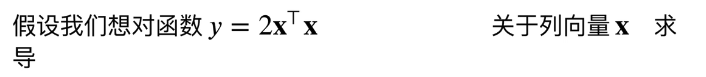

In [2]:
import torch

x = torch.arange(4.0)

x

tensor([0., 1., 2., 3.])

在计算y 关于x的梯度之前，需要一个地方存储梯度

In [3]:
x.requires_grad_(True) # 等价 x = torch.arange(4.0, requires_grad=True)

x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

现在计算y

In [4]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反响传播函数来自动计算y关于x每个分量的梯度

In [5]:
y.backward()

In [6]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [7]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算x的另一个函数

In [8]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [9]:
y = x.sum()
x,y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(6., grad_fn=<SumBackward0>))

In [10]:
y.backward()
y

tensor(6., grad_fn=<SumBackward0>)

In [11]:
x.grad

tensor([1., 1., 1., 1.])

在深度学习中，我们的目标不是计算微分矩阵，而是对批量中每个样本进行单独计算偏导数，并将它们的和作为最终结果。

In [17]:
x.grad.zero_()
y = x * x
# 等价于 y.backward(torch.ones(len(x)))
y.sum().backward()
x,y,x.grad

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([0., 2., 4., 6.]))

将某些计算移动到记录的计算图之外

detach() 方法用于返回一个新的 Tensor，这个 Tensor 和原来的 Tensor 共享相同的内存空间，但是不会被计算图所追踪，也就是说它不会参与反向传播，不会影响到原有的计算图，这使得它成为处理中间结果的一种有效方式

https://zhuanlan.zhihu.com/p/613991185

In [25]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u, x.grad, u,y

(tensor([True, True, True, True]),
 tensor([0., 1., 4., 9.]),
 tensor([0., 1., 4., 9.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [26]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 *x, x, y

(tensor([True, True, True, True]),
 tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

构建函数的计算图，如通过python控制流（条件、循环或任意函数调用），我们仍然可以计算的到变量的梯度。

In [28]:
def f(a):
    b = a *2
    while b.norm() < 100:
        b = b *2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

In [29]:
# 导入PyTorch库（尽管这在代码中没有明确显示，但根据上下文可以推断出）  
import torch  
  
# 定义一个函数f，接受一个参数a  
def f(a):  
    # 将a的值乘以2，并赋值给b  
    b = a * 2  
      
    # 当b的范数小于100时，执行循环体  
    while b.norm() < 100:  
        # 将b的值乘以2  
        b = b * 2  
      
    # 判断b的元素之和是否大于0  
    if b.sum() > 0:  
        # 如果大于0，将b的值赋给c  
        c = b  
    else:  
        # 如果小于或等于0，将b的值乘以100后赋给c  
        c = 100 * b  
      
    # 返回c的值  
    return c  
  
# 创建一个随机的PyTorch张量a，该张量可计算梯度  
a = torch.randn(size=(), requires_grad=True)  
  
# 调用函数f，并将结果赋值给d  
d = f(a)  
  
# 对d进行反向传播，计算梯度  
d.backward()  
  
# 检查计算得到的梯度是否等于d / a，并返回结果  
a.grad == d / a

tensor(True)

size=()表示生成的张量（tensor）的形状。具体来说，size=()意味着生成一个标量（scalar），也就是一个0维的张量。